In [ ]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
### Import datasets from sklearn.datasets
data = load_iris()
data

In [ ]:
#### Target 

target = data.target

In [ ]:
### Count the number of uniques values

N_= np.unique(target, return_counts=True)

In [ ]:
print('the unique values in the targets are', N_)

the unique values in the targets are (array([0, 1, 2]), array([50, 50, 50]))


In [ ]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [ ]:
#### Transforms target to binary classification problem
## your code
y = target[target!=2]

In [ ]:
y.shape

(100,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Replace all 0 in the target by -1 using numpy

In [ ]:
###using np.where
y = np.where(y==0,-1,y)

In [ ]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Get the input data

In [ ]:
### Inputs values
Inputs = data.data

In [ ]:
Inputs.shape

(150, 4)

## for simplicity let's keep only two features (columns) (`sepal width` and  `petal width`)

In [ ]:
Inputs = np.hstack([Inputs[:, 1].reshape(-1, 1), Inputs[:, 3].reshape(-1, 1)])

In [ ]:
Inputs[0]

array([3.5, 0.2])

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [ ]:
#### New Inputs

X = Inputs[:100,:]

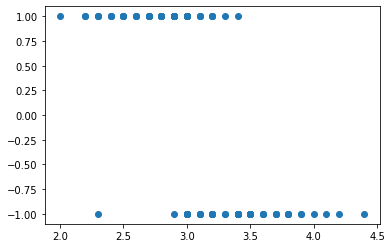

In [ ]:
plt.scatter(X[:, 0], y)

In [ ]:
X.shape

(100, 2)

## Combines the dataset and Shuffle them using numpy

In [ ]:
### Combines the dataset and Shuffle them

dataset = np.hstack((X,y.reshape(-1,1)))

In [ ]:
dataset[0]

array([ 3.5,  0.2, -1. ])

In [ ]:
n,_=dataset.shape

In [ ]:
#### Shuffle the dataset and split
perm_index = np.random.permutation(n)
#print(perm_index)
dataset_ = dataset[perm_index]
# dataset_
p = 0.8

X_train, Y_train = dataset_[:round(n*p), :-1], dataset_[:round(n*p), -1]
X_test, Y_test = dataset_[round(n*p):, :-1], dataset_[round(n*p):, -1]

In [ ]:
print(X_train.shape, X_test.shape)

(80, 2) (20, 2)


In [ ]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 2)
(20,)


In [ ]:
# def update_parameters(theta, x, y):
#   return theta + alpha*(y-yhat)@x

In [ ]:
class perceptron:
    
    eps = 1e-5
    def __init__(self,theta,iter_= 20):
        self.iter_ = iter_
        self.theta = theta
        
        
    def train(self, X, y):
        n,_= X.shape
        ## your code here
        for i in range(self.iter_):
          for j in range(n):
            yhat = self.theta.reshape(-1, 1).T@X[j].reshape(-1, 1)
            yhat = np.where(yhat>0, 1, -1)
            if y[j]*yhat<0:
              self.theta = self.theta + y[j]*X[j]
        return self.theta
        
                    
    def train_(self, X, y):
        n,_= X.shape
        while True:
          self.theta1 = self.theta
          ## add your code here
          # yhat = self.predict(X)
          # if y.T@yhat<0:
          #   self.theta = self.theta1 + y.T@X
          for j in range(n):
              yhat = self.theta.reshape(-1, 1).T@X[j].reshape(-1, 1)
              yhat = np.where(yhat>0, 1, -1)
              if y[j]*yhat<0:
                self.theta = self.theta + y[j]*X[j]
              if np.linalg.norm(self.theta - self.theta1)<self.__class__.eps:
                break
        return self.theta  
    
    def predict(self,X):
      yhat = X@self.theta
      yhat = np.where(yhat>0, 1, -1)
      return yhat
    
    def accuracy(self,X,Y):
      ypred = self.predict(X)
      result = np.mean(ypred == Y)
      return result * 100 


            

## Instanciate a new perceptron model and train it

In [ ]:
theta = np.random.rand(2)*1e-4
perc = perceptron(theta)

In [ ]:

perc.theta

array([2.76046124e-05, 6.02983288e-05])

In [ ]:
perc.train(X_train, Y_train)

array([-0.2999724,  1.0000603])

In [ ]:
perc.theta

array([-0.2999724,  1.0000603])

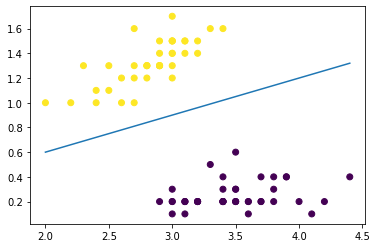

In [ ]:
slope = - perc.theta[0]/perc.theta[1]
min = np.amin(X_train[:, 0])
max = np.amax(X_train[:, 0])

x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_train[:,0], X_train[:, 1], marker="o", c=Y_train)
plt.plot(x1, x2)

## let's evaluate the model on the training data

In [ ]:
perc.predict(X_test)

array([ 1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        1,  1, -1])

In [ ]:
Y_test

array([ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1.])

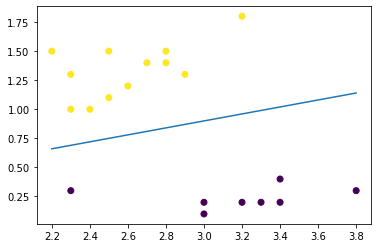

In [ ]:
slope = - perc.theta[0]/perc.theta[1]
min = np.amin(X_test[:, 0])
max = np.amax(X_test[:, 0])


x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_test[:,0], X_test[:, 1], marker="o", c=Y_test)
plt.plot(x1, x2)

In [ ]:
perc.accuracy(X_test, Y_test)

100.0